<a href="https://colab.research.google.com/github/Dash-Akanksha/Codings/blob/main/Face%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

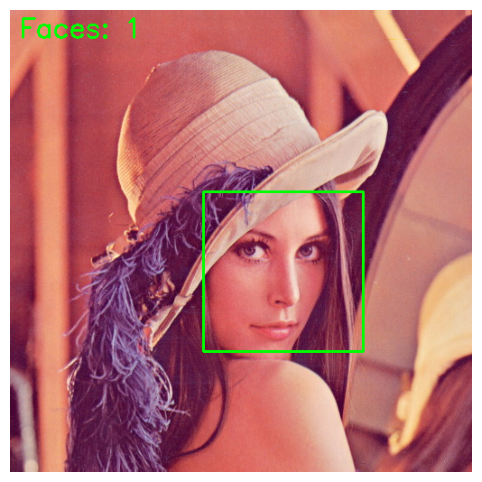

In [3]:
# FACE LOCALIZATION USING MULTI-LEVEL HAAR CASCADES + FPR
# Author: Akanksha Dash (for report/project use)

# Step 1: Install and import
!pip install opencv-python matplotlib --quiet

import cv2
import matplotlib.pyplot as plt

# Step 2: Load image (upload or use sample)
# 👉 In Colab: upload image using the sidebar or replace path below
image_path = "/content/sample_face.jpg"  # change this if you uploaded your own
try:
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError
except:
    # fallback: use OpenCV sample image if path is wrong
    !wget -q https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg -O /content/sample_face.jpg
    img = cv2.imread("/content/sample_face.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

# Step 3: Load multiple Haar cascades
base = cv2.data.haarcascades
face_cascades = [
    cv2.CascadeClassifier(base + 'haarcascade_frontalface_default.xml'),
    cv2.CascadeClassifier(base + 'haarcascade_frontalface_alt.xml'),
    cv2.CascadeClassifier(base + 'haarcascade_frontalface_alt2.xml')
]
eye_cascade = cv2.CascadeClassifier(base + 'haarcascade_eye.xml')

# Step 4: Multi-level detection
faces = []
for fc in face_cascades:
    dets = fc.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30,30))
    for (x, y, w, h) in dets:
        faces.append((x, y, w, h))

# Step 5: False Positive Reduction – verify eyes inside each detected face
verified = []
for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=3)
    if len(eyes) >= 1:  # at least one eye => keep it
        verified.append((x, y, w, h))


# Step 6: Remove duplicates and draw results
verified = cv2.groupRectangles(verified, groupThreshold=1, eps=0.3)[0]

result = img.copy()
for (x, y, w, h) in verified:
    cv2.rectangle(result, (x, y), (x+w, y+h), (0,255,0), 2)
cv2.putText(result, f"Faces: {len(verified)}", (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)


# Step 7: Display
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.axis('off')
plt.imshow(result_rgb)
plt.show()
